## 라이브러리 추가

In [1]:
import pandas as pd
import numpy as np

# 주요 라이브러리 import
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
from sklearn.datasets import fetch_openml
import sklearn.datasets as data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder # 라벨인코더 임포트
from sklearn.model_selection import KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from pandas.plotting import parallel_coordinates # 코디네이츠 그래프 그릴 때 필요한 라이브러리
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier # 모델링 중 하나
# cross_val_score: 다양한 셈플링을 해서 여러번 테스트-->평균치를 구해본다.
from sklearn.model_selection import cross_val_score # crossvaludation해주는거
from sklearn.metrics import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm  # 폰트 관련 용도

from sklearn.model_selection import GridSearchCV # 그리드서치
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.preprocessing import LabelEncoder

In [2]:
# 앙상블
from sklearn.ensemble import VotingClassifier

from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier # tree방법론의 DecisionTreeClassifier사용
from sklearn.svm import SVC # svm방법론의 SVC사용
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

C:\Users\hi\AppData\Roaming\Python\Python37\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "


In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 폰트 관련 용도
%config InlineBackend.figure_format = 'retina'

fontpath = '../data03/NanumGothic.ttf'
font_name = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font_name)

## 데이터 불러오기

In [4]:
df = pd.read_excel('../../쇼핑몰_최종.xlsx')
df.head(2)

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
0,2020,패션/화장품,평일,월,F.22-02시,F,B.3O대,890,94.7,18.2,14.0,18.9,48.9,3.8,188.0
1,2020,패션/화장품,휴일,일,F.22-02시,F,A.2O대,2958,97.5,20.2,18.2,15.8,45.8,3.7,196.0


In [63]:
df.columns

Index(['CRI_YM', 'TAG', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)',
       '네이버 태그 클릭량'],
      dtype='object')

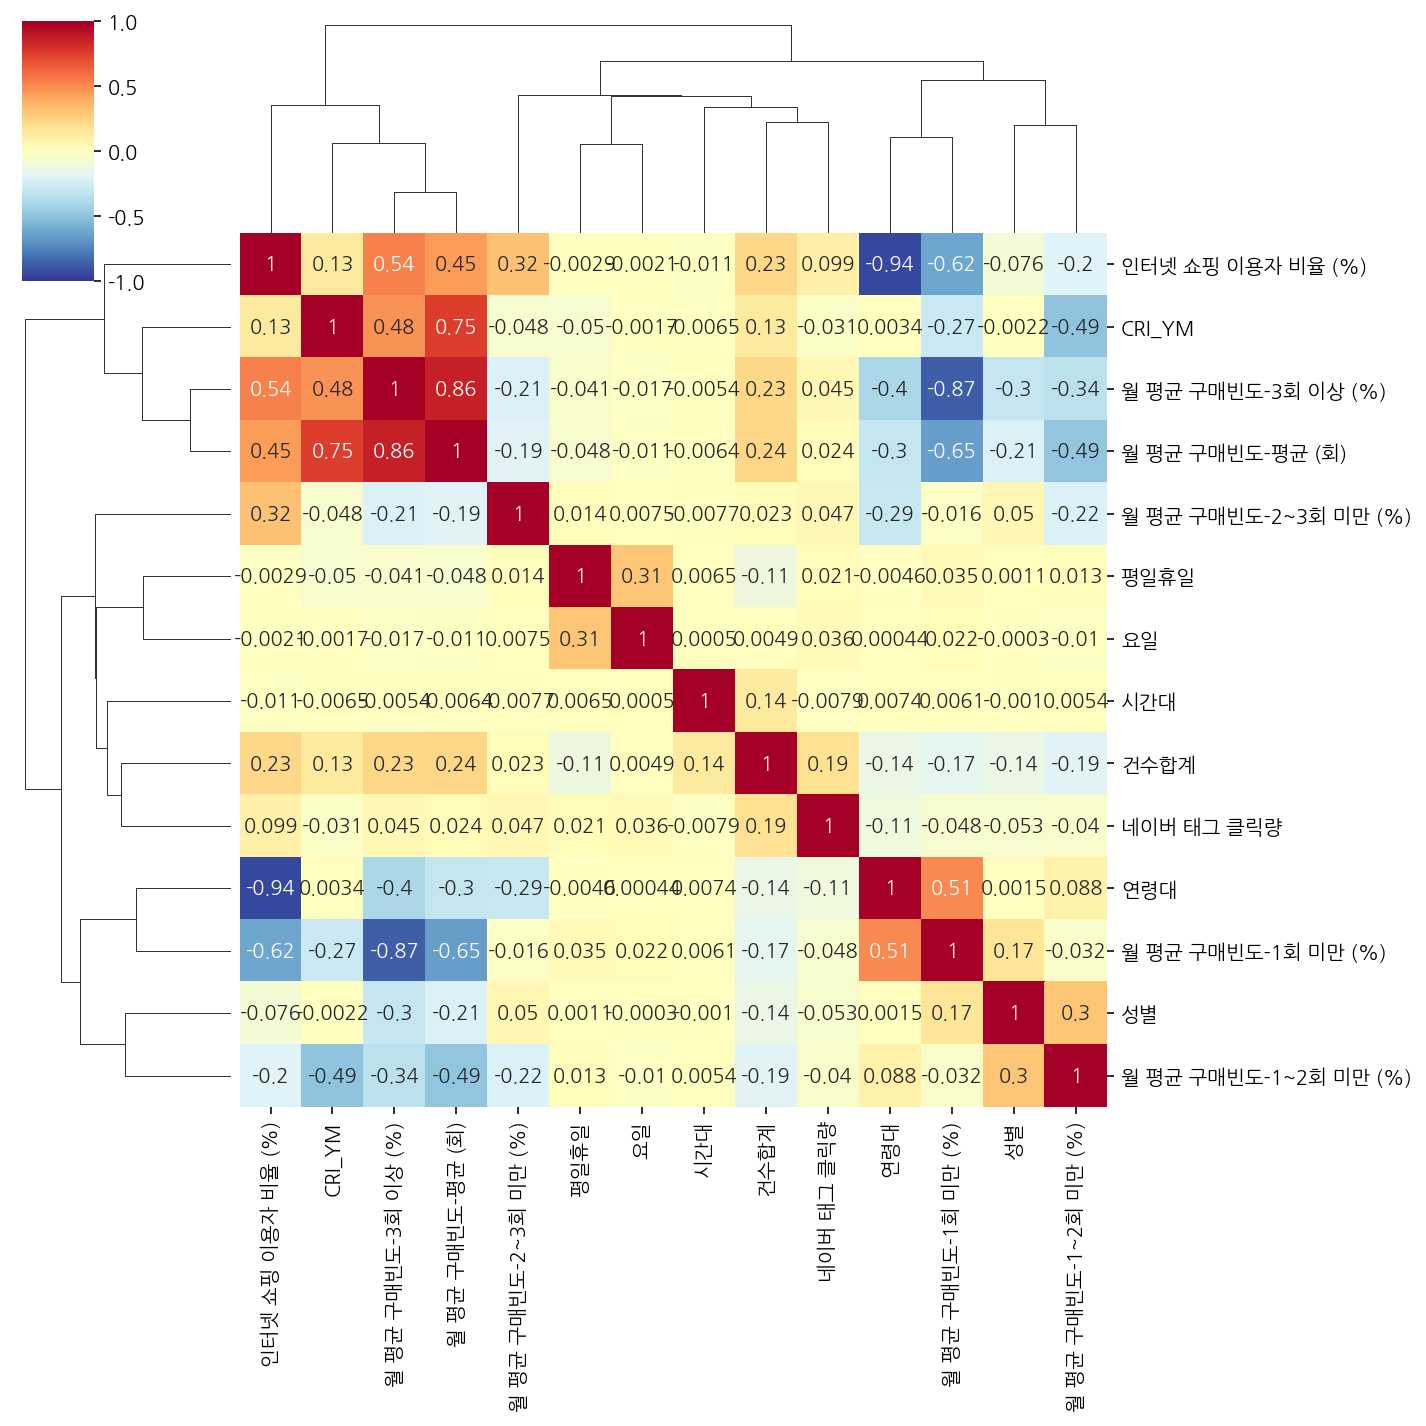

In [66]:
df_corr = df.corr()

sns.clustermap(df_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

## 라벨 인코딩

In [6]:
encoder = LabelEncoder()
encoder1 = LabelEncoder()
encoder2 = LabelEncoder()
encoder3 = LabelEncoder()
encoder4 = LabelEncoder()

In [7]:
df['평일휴일'] = encoder.fit_transform(df['평일휴일'])
df['요일'] = encoder1.fit_transform(df['요일'])
df['시간대'] = encoder2.fit_transform(df['시간대'])
df['성별'] = encoder3.fit_transform(df['성별'])
df['연령대'] = encoder4.fit_transform(df['연령대'])

### 기존 DataFrame tree

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)','네이버 태그 클릭량']],
    df['TAG'],
    test_size=0.2,
    random_state=42
)

In [9]:
for max_depth in range(1, 19):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_pred = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_pred) * 100
    print(max_depth, score)

1 84.775
2 88.775
3 93.45
4 93.45
5 94.975
6 95.325
7 96.45
8 97.15
9 97.625
10 97.875
11 97.95
12 98.1
13 98.1
14 98.225
15 98.075
16 98.075
17 98.1
18 98.1


In [10]:
for max_features in range(1, 3):
    model = DecisionTreeClassifier(max_depth = 12, max_features = max_features, random_state = 42)
    y_pred2 = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_pred) * 100
    print(max_features, score)

1 98.1
2 98.1


In [11]:
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 12,
    max_features = 2,
    random_state = 42
)

In [12]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, max_features=2, random_state=42)

In [13]:
# feature_names = X_train.columns.tolist()
# from sklearn.tree import plot_tree

# plt.figure(figsize = (15, 15))
# tree = plot_tree(dt, feature_names = feature_names, fontsize = 10, filled = True)
# plt.savefig('plot_tree.png')

In [14]:
print("훈련 세트 정확도: {:.3f}".format(dt.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(dt.score(X_test, y_test)))

훈련 세트 정확도: 0.969
테스트 세트 정확도: 0.947


### 기존 DataFrame에서 네이버 태그 클릭량이 빠진 경우 tree

In [15]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)']],
    df['TAG'],
    test_size=0.2,
    random_state=42
)

In [16]:
for max_depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_pred2 = model.fit(X_train2, y_train2).predict(X_test2)
    score = accuracy_score(y_test2, y_pred2) * 100
    print(max_depth, score)

1 61.85000000000001
2 61.75000000000001
3 63.025
4 63.175000000000004
5 63.324999999999996
6 63.65
7 63.025
8 62.724999999999994
9 62.45
10 62.224999999999994
11 61.5
12 60.699999999999996
13 59.824999999999996
14 58.099999999999994
15 57.775
16 56.89999999999999
17 56.625
18 56.375
19 55.074999999999996


In [17]:
for max_features in range(1, 14):
    model = DecisionTreeClassifier(max_depth = 6, max_features = max_features, random_state = 42)
    y_pred2 = model.fit(X_train2, y_train2).predict(X_test2)
    score = accuracy_score(y_test2, y_pred2) * 100
    print(max_features, score)

1 62.224999999999994
2 62.925
3 62.7
4 63.4
5 63.324999999999996
6 63.575
7 62.675000000000004
8 62.475
9 63.4
10 63.0
11 63.74999999999999
12 63.475
13 63.65


In [18]:
dt2 = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 6,
    max_features = 13,
    random_state = 42
)

In [19]:
dt2.fit(X_train2, y_train2)

DecisionTreeClassifier(max_depth=6, max_features=13, random_state=42)

In [20]:
# feature_names = X_train2.columns.tolist()
# from sklearn.tree import plot_tree

# plt.figure(figsize = (15, 15))
# tree = plot_tree(dt, feature_names = feature_names, fontsize = 10, filled = True)
# plt.savefig('plot_tree2.png')

In [21]:
print("훈련 세트 정확도: {:.3f}".format(dt2.score(X_train2, y_train2)))
print("테스트 세트 정확도: {:.3f}".format(dt2.score(X_test2, y_test2)))

훈련 세트 정확도: 0.630
테스트 세트 정확도: 0.636


### 기존 DataFrame에서 네이버 클릭량 / 건수합계가 빠진 경우 tree

In [22]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    df[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)']],
    df['TAG'],
    test_size=0.2,
    random_state=42
)

In [23]:
for max_depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_pred3 = model.fit(X_train3, y_train3).predict(X_test3)
    score = accuracy_score(y_test3, y_pred3) * 100
    print(max_depth, score)

1 61.85000000000001
2 61.85000000000001
3 61.85000000000001
4 61.85000000000001
5 61.724999999999994
6 61.724999999999994
7 61.675000000000004
8 61.724999999999994
9 61.625
10 61.5
11 61.5
12 61.5
13 61.5
14 61.5
15 61.5
16 61.5
17 61.5
18 61.5
19 61.5


In [24]:
for max_features in range(1, 13):
    model = DecisionTreeClassifier(max_depth = 10, max_features = max_features, random_state = 42)
    y_pred3 = model.fit(X_train3, y_train3).predict(X_test3)
    score = accuracy_score(y_test3, y_pred3) * 100
    print(max_features, score)

1 61.5
2 61.75000000000001
3 61.625
4 61.625
5 61.5
6 61.5
7 61.5
8 61.625
9 61.5
10 61.5
11 61.5
12 61.5


In [25]:
dt3 = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 10,
    max_features = 9,
    random_state = 42
)

In [26]:
dt3.fit(X_train3, y_train3)

DecisionTreeClassifier(max_depth=10, max_features=9, random_state=42)

In [27]:
# feature_names = X_train3.columns.tolist()
# from sklearn.tree import plot_tree

# plt.figure(figsize = (50, 15))
# tree = plot_tree(dt, feature_names = feature_names, fontsize = 10, filled = True)
# plt.savefig('plot_tree3.png')

In [28]:
print("훈련 세트 정확도: {:.3f}".format(dt3.score(X_train3, y_train3)))
print("테스트 세트 정확도: {:.3f}".format(dt3.score(X_test3, y_test3)))

훈련 세트 정확도: 0.610
테스트 세트 정확도: 0.615


### 만약 태그에서 '생활/취미/사무용품/인테리어/골프용품'이 빠진다면?

In [29]:
df['TAG'].values

array(['패션/화장품', '패션/화장품', '패션/화장품', ..., '생활/취미/사무용품/인테리어/골프용품',
       '생활/취미/사무용품/인테리어/골프용품', '생활/취미/사무용품/인테리어/골프용품'], dtype=object)

In [30]:
df2 = df.copy()

In [31]:
df2

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
0,2020,패션/화장품,0,3,5,0,1,890,94.7,18.2,14.0,18.9,48.9,3.8,188.00
1,2020,패션/화장품,1,4,5,0,0,2958,97.5,20.2,18.2,15.8,45.8,3.7,196.00
2,2020,패션/화장품,0,1,5,0,0,1898,97.5,20.2,18.2,15.8,45.8,3.7,170.00
3,2020,패션/화장품,1,5,5,0,0,2003,97.5,20.2,18.2,15.8,45.8,3.7,172.00
4,2020,패션/화장품,0,2,0,0,4,110,19.8,33.3,13.4,22.7,30.5,2.6,177.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,2020,생활/취미/사무용품/인테리어/골프용품,0,2,4,0,3,514,46.3,28.2,14.1,20.2,37.4,3.4,12.75
19993,2019,생활/취미/사무용품/인테리어/골프용품,1,4,3,1,0,233,94.3,13.2,20.4,22.1,44.2,2.9,42.00
19994,2020,생활/취미/사무용품/인테리어/골프용품,0,0,3,0,2,107,76.8,24.1,12.9,17.6,45.4,3.8,28.80
19995,2021,생활/취미/사무용품/인테리어/골프용품,0,6,2,0,4,415,31.7,11.0,18.7,19.6,50.7,4.1,5.00


In [32]:
drop_tag = df2[df2['TAG'] == '생활/취미/사무용품/인테리어/골프용품'].index

In [33]:
df2 = df2.drop(drop_tag)

In [34]:
df2

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
0,2020,패션/화장품,0,3,5,0,1,890,94.7,18.2,14.0,18.9,48.9,3.8,188.0
1,2020,패션/화장품,1,4,5,0,0,2958,97.5,20.2,18.2,15.8,45.8,3.7,196.0
2,2020,패션/화장품,0,1,5,0,0,1898,97.5,20.2,18.2,15.8,45.8,3.7,170.0
3,2020,패션/화장품,1,5,5,0,0,2003,97.5,20.2,18.2,15.8,45.8,3.7,172.0
4,2020,패션/화장품,0,2,0,0,4,110,19.8,33.3,13.4,22.7,30.5,2.6,177.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7760,2019,애완용품,0,2,5,0,3,133,41.0,22.6,24.8,17.7,34.9,2.9,83.4
7761,2019,애완용품,0,6,4,1,3,75,39.0,23.5,21.2,14.6,40.7,2.5,81.8
7762,2019,애완용품,0,0,0,0,4,4,14.5,24.4,27.1,12.9,35.5,2.7,71.6
7763,2019,애완용품,0,3,0,0,4,6,14.5,24.4,27.1,12.9,35.5,2.7,89.5


In [35]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(
    df2[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)']],
    df2['TAG'],
    test_size=0.2,
    random_state=42
)

In [36]:
for max_depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_pred4 = model.fit(X_train4, y_train4).predict(X_test4)
    score = accuracy_score(y_test4, y_pred4) * 100
    print(max_depth, score)

1 59.562137797810685
2 59.562137797810685
3 59.81970379909852
4 59.43335479716677
5 60.27044430135222
6 59.81970379909852
7 60.012878300064386
8 59.30457179652285
9 62.91049581455248
10 61.751448808757246
11 61.10753380553767
12 62.7173213135866
13 62.13779781068899
14 63.10367031551836
15 62.39536381197682
16 63.296844816484224
17 63.4900193174501
18 63.9407598197038
19 62.84610431423052


In [37]:
for max_features in range(1, 14):
    model = DecisionTreeClassifier(max_depth = 18, max_features = max_features, random_state = 42)
    y_pred4 = model.fit(X_train4, y_train4).predict(X_test4)
    score = accuracy_score(y_test4, y_pred4) * 100
    print(max_features, score)

1 48.35801674179008
2 51.38441725692209
3 54.797166773985836
4 54.28203477141017
5 60.65679330328396
6 60.463618802318095
7 59.626529298132645
8 59.690920798454606
9 63.61880231809401
10 61.88023180940115
11 62.20218931101095
12 63.61880231809401
13 63.9407598197038


In [38]:
dt4 = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 18,
    max_features = 13,
    random_state = 42
)

In [39]:
dt4.fit(X_train4, y_train4)

DecisionTreeClassifier(max_depth=18, max_features=13, random_state=42)

In [40]:
# feature_names = X_train4.columns.tolist()
# from sklearn.tree import plot_tree

# plt.figure(figsize = (15, 15))
# tree = plot_tree(dt, fontsize = 10, filled = True)
# plt.savefig('plot_tree4.png')

In [41]:
print("훈련 세트 정확도: {:.3f}".format(dt4.score(X_train4, y_train4)))
print("테스트 세트 정확도: {:.3f}".format(dt4.score(X_test4, y_test4)))

훈련 세트 정확도: 0.958
테스트 세트 정확도: 0.639


### 만약 태그에서 '패션/화장품'이 빠진다면?

In [42]:
df3 = df.copy()

In [43]:
drop_tag2 = df3[df3['TAG'] == '패션/화장품'].index

In [44]:
df3 = df3.drop(drop_tag2)
df3

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
4661,2019,식료품,0,3,1,1,4,171,20.3,20.8,21.4,12.3,45.4,3.2,97.00
4662,2019,식료품,1,2,5,1,4,42,20.3,20.8,21.4,12.3,45.4,3.2,100.00
4663,2019,식료품,1,5,3,1,1,1647,86.3,14.6,21.3,22.4,41.7,2.9,65.00
4664,2021,식료품,0,1,3,1,1,4684,91.5,10.6,15.6,18.5,55.3,4.9,88.00
4665,2021,식료품,1,4,3,1,3,2946,55.7,17.1,21.1,18.6,43.3,3.8,90.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,2020,생활/취미/사무용품/인테리어/골프용품,0,2,4,0,3,514,46.3,28.2,14.1,20.2,37.4,3.4,12.75
19993,2019,생활/취미/사무용품/인테리어/골프용품,1,4,3,1,0,233,94.3,13.2,20.4,22.1,44.2,2.9,42.00
19994,2020,생활/취미/사무용품/인테리어/골프용품,0,0,3,0,2,107,76.8,24.1,12.9,17.6,45.4,3.8,28.80
19995,2021,생활/취미/사무용품/인테리어/골프용품,0,6,2,0,4,415,31.7,11.0,18.7,19.6,50.7,4.1,5.00


In [45]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(
    df2[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)']],
    df2['TAG'],
    test_size=0.2,
    random_state=42
)

In [46]:
for max_depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_pred5 = model.fit(X_train5, y_train5).predict(X_test5)
    score = accuracy_score(y_test5, y_pred5) * 100
    print(max_depth, score)

1 59.562137797810685
2 59.562137797810685
3 59.81970379909852
4 59.43335479716677
5 60.27044430135222
6 59.81970379909852
7 60.012878300064386
8 59.30457179652285
9 62.91049581455248
10 61.751448808757246
11 61.10753380553767
12 62.7173213135866
13 62.13779781068899
14 63.10367031551836
15 62.39536381197682
16 63.296844816484224
17 63.4900193174501
18 63.9407598197038
19 62.84610431423052


In [47]:
for max_features in range(1, 14):
    model = DecisionTreeClassifier(max_depth = 18, max_features = max_features, random_state = 42)
    y_pred5 = model.fit(X_train5, y_train5).predict(X_test5)
    score = accuracy_score(y_test5, y_pred5) * 100
    print(max_features, score)

1 48.35801674179008
2 51.38441725692209
3 54.797166773985836
4 54.28203477141017
5 60.65679330328396
6 60.463618802318095
7 59.626529298132645
8 59.690920798454606
9 63.61880231809401
10 61.88023180940115
11 62.20218931101095
12 63.61880231809401
13 63.9407598197038


In [48]:
dt5 = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 18,
    max_features = 13,
    random_state = 42
)

In [49]:
dt5.fit(X_train5, y_train5)

DecisionTreeClassifier(max_depth=18, max_features=13, random_state=42)

In [50]:
print("훈련 세트 정확도: {:.3f}".format(dt5.score(X_train5, y_train5)))
print("테스트 세트 정확도: {:.3f}".format(dt5.score(X_test5, y_test5)))

훈련 세트 정확도: 0.958
테스트 세트 정확도: 0.639


## 만약 태그에서 '식료품'이 빠진다면?

In [51]:
df4 = df.copy()

In [52]:
drop_tag3 = df4[df4['TAG'] == '식료품'].index

In [53]:
df4 = df4.drop(drop_tag3)
df4

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,인터넷 쇼핑 이용자 비율 (%),월 평균 구매빈도-1회 미만 (%),월 평균 구매빈도-1~2회 미만 (%),월 평균 구매빈도-2~3회 미만 (%),월 평균 구매빈도-3회 이상 (%),월 평균 구매빈도-평균 (회),네이버 태그 클릭량
0,2020,패션/화장품,0,3,5,0,1,890,94.7,18.2,14.0,18.9,48.9,3.8,188.00
1,2020,패션/화장품,1,4,5,0,0,2958,97.5,20.2,18.2,15.8,45.8,3.7,196.00
2,2020,패션/화장품,0,1,5,0,0,1898,97.5,20.2,18.2,15.8,45.8,3.7,170.00
3,2020,패션/화장품,1,5,5,0,0,2003,97.5,20.2,18.2,15.8,45.8,3.7,172.00
4,2020,패션/화장품,0,2,0,0,4,110,19.8,33.3,13.4,22.7,30.5,2.6,177.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,2020,생활/취미/사무용품/인테리어/골프용품,0,2,4,0,3,514,46.3,28.2,14.1,20.2,37.4,3.4,12.75
19993,2019,생활/취미/사무용품/인테리어/골프용품,1,4,3,1,0,233,94.3,13.2,20.4,22.1,44.2,2.9,42.00
19994,2020,생활/취미/사무용품/인테리어/골프용품,0,0,3,0,2,107,76.8,24.1,12.9,17.6,45.4,3.8,28.80
19995,2021,생활/취미/사무용품/인테리어/골프용품,0,6,2,0,4,415,31.7,11.0,18.7,19.6,50.7,4.1,5.00


In [54]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(
    df2[['CRI_YM', '평일휴일', '요일', '시간대', '성별', '연령대', '건수합계',
       '인터넷 쇼핑 이용자 비율 (%)', '월 평균 구매빈도-1회 미만 (%)', '월 평균 구매빈도-1~2회 미만 (%)',
       '월 평균 구매빈도-2~3회 미만 (%)', '월 평균 구매빈도-3회 이상 (%)', '월 평균 구매빈도-평균 (회)']],
    df2['TAG'],
    test_size=0.2,
    random_state=42
)

In [55]:
for max_depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth = max_depth, random_state = 42)
    y_pred6 = model.fit(X_train6, y_train6).predict(X_test6)
    score = accuracy_score(y_test6, y_pred6) * 100
    print(max_depth, score)

1 59.562137797810685
2 59.562137797810685
3 59.81970379909852
4 59.43335479716677
5 60.27044430135222
6 59.81970379909852
7 60.012878300064386
8 59.30457179652285
9 62.91049581455248
10 61.751448808757246
11 61.10753380553767
12 62.7173213135866
13 62.13779781068899
14 63.10367031551836
15 62.39536381197682
16 63.296844816484224
17 63.4900193174501
18 63.9407598197038
19 62.84610431423052


In [56]:
for max_features in range(1, 14):
    model = DecisionTreeClassifier(max_depth = 18, max_features = max_features, random_state = 42)
    y_pred6 = model.fit(X_train6, y_train6).predict(X_test6)
    score = accuracy_score(y_test6, y_pred6) * 100
    print(max_features, score)

1 48.35801674179008
2 51.38441725692209
3 54.797166773985836
4 54.28203477141017
5 60.65679330328396
6 60.463618802318095
7 59.626529298132645
8 59.690920798454606
9 63.61880231809401
10 61.88023180940115
11 62.20218931101095
12 63.61880231809401
13 63.9407598197038


In [57]:
for random_state in range(42, 100):
    model = DecisionTreeClassifier(max_depth = 18, max_features = 13, random_state = random_state)
    y_pred6 = model.fit(X_train6, y_train6).predict(X_test6)
    score = accuracy_score(y_test6, y_pred6) * 100
    print(random_state, score)

42 63.9407598197038
43 63.61880231809401
44 63.0392788151964
45 63.61880231809401
46 63.61880231809401
47 63.42562781712814
48 63.36123631680618
49 63.232453316162264
50 63.68319381841597
51 63.36123631680618
52 62.91049581455248
53 63.4900193174501
54 63.10367031551836
55 62.91049581455248
56 62.91049581455248
57 63.1680618158403
58 63.10367031551836
59 63.9407598197038
60 63.55441081777206
61 63.10367031551836
62 63.68319381841597
63 64.00515132002576
64 63.232453316162264
65 63.87636831938184
66 63.36123631680618
67 64.00515132002576
68 64.00515132002576
69 63.232453316162264
70 63.87636831938184
71 63.36123631680618
72 62.97488731487444
73 63.81197681905988
74 63.87636831938184
75 63.61880231809401
76 62.91049581455248
77 63.81197681905988
78 63.68319381841597
79 63.42562781712814
80 64.00515132002576
81 64.13393432066967
82 63.74758531873793
83 63.74758531873793
84 63.296844816484224
85 63.74758531873793
86 62.52414681262073
87 62.84610431423052
88 63.81197681905988
89 63.03927881

In [58]:
dt6 = DecisionTreeClassifier(
    criterion='gini',
    max_depth = 18,
    max_features = 13,
    random_state = 63
)

In [59]:
dt6.fit(X_train6, y_train6)

DecisionTreeClassifier(max_depth=18, max_features=13, random_state=63)

In [60]:
print("훈련 세트 정확도: {:.3f}".format(dt6.score(X_train6, y_train6)))
print("테스트 세트 정확도: {:.3f}".format(dt6.score(X_test6, y_test6)))

훈련 세트 정확도: 0.958
테스트 세트 정확도: 0.640


In [61]:
dt6.feature_importances_

array([0.00919559, 0.03983143, 0.11711003, 0.11633509, 0.02133302,
       0.01569146, 0.47797152, 0.05355224, 0.01774935, 0.03497214,
       0.03559997, 0.03268732, 0.02797084])